In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import data_mining as dm
import pandas as pd


#en mi compu corre sobre la 3.9.5

In [32]:
#clean data and save it
train_dataset,seq_len,n_features,val_dataset=dm.clean_and_get_Data('spoofing_1_random.csv')
train_dataset,seq_len,n_features,val_dataset=dm.clean_and_get_Data('brute_force_sample.csv')
train_dataset,seq_len,n_features,val_dataset=dm.clean_and_get_Data('ddos_short_sample.csv')


c:\Users\Ivan\Documents\hackaton_talent_2024\Cybersecurity\data_mining.py:51: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Source'] = df['Source'].str.replace('.', '')
c:\Users\Ivan\Documents\hackaton_talent_2024\Cybersecurity\data_mining.py:52: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Destination'] = df['Destination'].str.replace('.', '')


(1685, 5)


c:\Users\Ivan\Documents\hackaton_talent_2024\Cybersecurity\data_mining.py:51: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Source'] = df['Source'].str.replace('.', '')
c:\Users\Ivan\Documents\hackaton_talent_2024\Cybersecurity\data_mining.py:52: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Destination'] = df['Destination'].str.replace('.', '')


(7208, 5)


c:\Users\Ivan\Documents\hackaton_talent_2024\Cybersecurity\data_mining.py:51: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Source'] = df['Source'].str.replace('.', '')
c:\Users\Ivan\Documents\hackaton_talent_2024\Cybersecurity\data_mining.py:52: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Destination'] = df['Destination'].str.replace('.', '')


(40358, 5)


In [58]:
#get the data and normalize it

#data spofing----------------------------------------------------------
data_spofing=pd.read_csv('clean_datasetspoofing_1_random.csv')
scaler = StandardScaler()
data_spofing_normalized=scaler.fit_transform(data_spofing)
print("shape data spoofing",data_spofing_normalized.shape)

#data bening----------------------------------------------------------
data_benign=pd.read_csv('clean_datasetbenign.csv')
scaler = StandardScaler()
#take only the first  1600 for now
data_benign_normalized=scaler.fit_transform(data_benign[:10600])
print("shape data benign",data_benign_normalized.shape)




#data brute force----------------------------------------------------------
data_brute_force=pd.read_csv('clean_datasetbrute_force_sample.csv')
scaler = StandardScaler()
#take only the first  1600 for now
data_brute_force_normalized=scaler.fit_transform(data_brute_force[:10600])
print("shape data brute force",data_brute_force_normalized.shape)

#data ddos----------------------------------------------------------
data_ddos=pd.read_csv('clean_datasetddos_short_sample.csv')
scaler = StandardScaler()
#take only the first  1600 for now
data_ddos_normalized=scaler.fit_transform(data_ddos[:10600])
print("shape data ddos",data_ddos_normalized.shape)


#join the data nomralized randomly
data=np.concatenate((data_spofing_normalized,data_benign_normalized),axis=0)
data=np.concatenate((data,data_brute_force_normalized),axis=0)
data=np.concatenate((data,data_ddos_normalized),axis=0)

labels0=np.zeros(data_spofing_normalized.shape[0])
labels1=np.ones(data_benign_normalized.shape[0])
labels2=np.full(data_brute_force_normalized.shape[0],2)
labels3=np.full(data_ddos_normalized.shape[0],3)

labels=np.concatenate((labels0,labels1),axis=0)
labels=np.concatenate((labels,labels2),axis=0)
labels=np.concatenate((labels,labels3),axis=0)


joined_data=np.column_stack((data,labels))

print(joined_data.shape)
print(joined_data[0])
np.random.shuffle(joined_data)
print(joined_data.shape)
print(joined_data[0])

data=joined_data[:,:-1]
labels=joined_data[:,-1]
print(data[0])
print(labels[0])

shape data spoofing (1685, 5)
shape data benign (10600, 5)
shape data brute force (7208, 5)
shape data ddos (10600, 5)
(30093, 6)
[-1.83561811 -0.24381098 -0.31459814 -1.07887162 -0.303835    0.        ]
(30093, 6)
[-0.17403871 -0.27713438 -0.29121814  0.53371308  0.37188423  2.        ]
[-0.17403871 -0.27713438 -0.29121814  0.53371308  0.37188423]
2.0


Epoch [10/300], Loss: 0.3650
Epoch [20/300], Loss: 0.3411
Epoch [30/300], Loss: 0.3187
Epoch [40/300], Loss: 0.2978
Epoch [50/300], Loss: 0.2783
Epoch [60/300], Loss: 0.2601
Epoch [70/300], Loss: 0.2432
Epoch [80/300], Loss: 0.2273
Epoch [90/300], Loss: 0.2125
Epoch [100/300], Loss: 0.1986
Epoch [110/300], Loss: 0.1857
Epoch [120/300], Loss: 0.1736
Epoch [130/300], Loss: 0.1624
Epoch [140/300], Loss: 0.1518
Epoch [150/300], Loss: 0.1420
Epoch [160/300], Loss: 0.1328
Epoch [170/300], Loss: 0.1242
Epoch [180/300], Loss: 0.1162
Epoch [190/300], Loss: 0.1087
Epoch [200/300], Loss: 0.1017
Epoch [210/300], Loss: 0.0951
Epoch [220/300], Loss: 0.0890
Epoch [230/300], Loss: 0.0833
Epoch [240/300], Loss: 0.0779
Epoch [250/300], Loss: 0.0729
Epoch [260/300], Loss: 0.0683
Epoch [270/300], Loss: 0.0639
Epoch [280/300], Loss: 0.0598
Epoch [290/300], Loss: 0.0560
Epoch [300/300], Loss: 0.0524
(30093, 3)


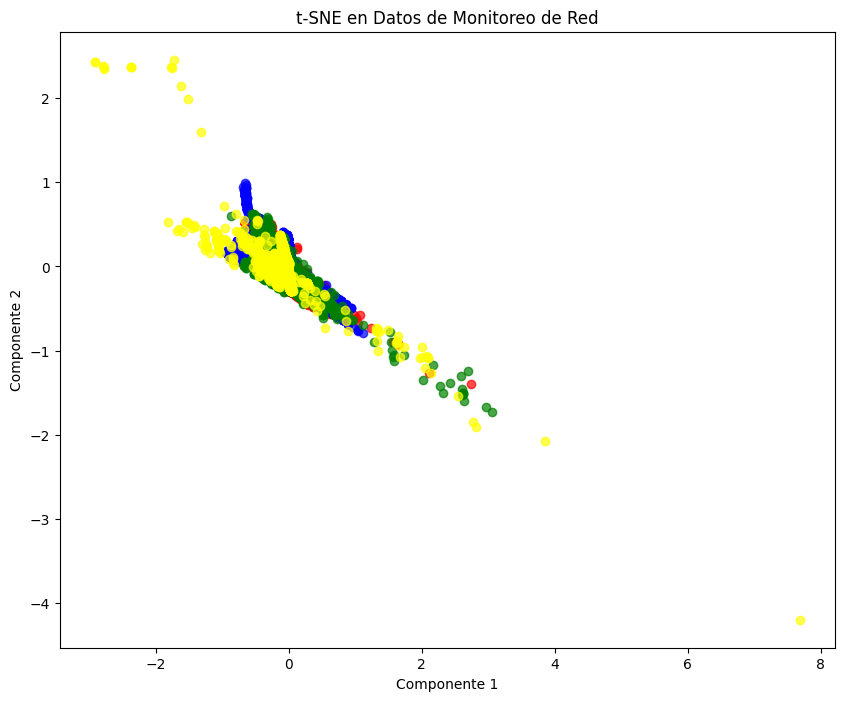

In [67]:
class TSNE(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(TSNE, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

# Definir los parámetros
input_dim = data.shape[1]  # Dimensión de entrada
output_dim = 3  # Dimensión de salida para t-SNE
lr = 0.005  # Tasa de aprendizaje
epochs = 300  # Número de épocas

# Definir el modelo y la función de pérdida
model = TSNE(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

# Convertir los datos a tensores de PyTorch
X_tensor = torch.tensor(data, dtype=torch.float32)

# Entrenamiento
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = criterion(output, torch.zeros_like(output))  # t-SNE minimiza la divergencia de Kullback-Leibler
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Obtener la representación reducida
with torch.no_grad():
    reduced_X = model(X_tensor).numpy()

print(reduced_X.shape)

#join the labels to the reduced data
reduced_X=np.column_stack((reduced_X,labels))

data_reduced_spoofig=reduced_X[reduced_X[:,-1]==0]
data_reduced_benign=reduced_X[reduced_X[:,-1]==1]
data_reduced_brute_force=reduced_X[reduced_X[:,-1]==2]
data_reduced_ddos=reduced_X[reduced_X[:,-1]==3]



# Visualizar los resultados
plt.figure(figsize=(10, 8))
#plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
plt.scatter(data_reduced_spoofig[:, 0], data_reduced_spoofig[:, 1], c='red', alpha=0.7)
plt.scatter(data_reduced_benign[:, 0], data_reduced_benign[:, 1], c='blue', alpha=0.7)
plt.scatter(data_reduced_brute_force[:, 0], data_reduced_brute_force[:, 1], c='green', alpha=0.7)
plt.scatter(data_reduced_ddos[:, 0], data_reduced_ddos[:, 1], c='yellow', alpha=0.7)

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('t-SNE en Datos de Monitoreo de Red')

#legend for labels with colors 0,1,2,3
#plt.legend(['Spoofing','Benign','Brute Force','DDoS'])
plt.show()


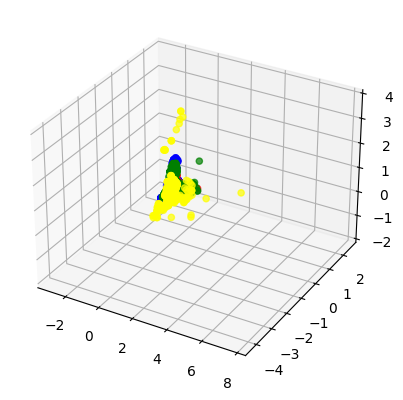

In [74]:
#3d plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_reduced_spoofig[:, 0], data_reduced_spoofig[:, 1], data_reduced_spoofig[:, 2], c='red', alpha=0.7)
ax.scatter(data_reduced_benign[:, 0], data_reduced_benign[:, 1], data_reduced_benign[:, 2], c='blue', alpha=0.7)
ax.scatter(data_reduced_brute_force[:, 0], data_reduced_brute_force[:, 1], data_reduced_brute_force[:, 2], c='green', alpha=0.7)
ax.scatter(data_reduced_ddos[:, 0], data_reduced_ddos[:, 1], data_reduced_ddos[:, 2], c='yellow', alpha=0.7)

plt.show()


Logistic regresion
===

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Supongamos que 'reduced_X' es tu conjunto de datos reducido y 'labels' son las etiquetas de clase correspondientes

# Dividir los datos en conjuntos de entrenamiento y prueba
print(reduced_X[:10])
print(labels[:10])
X_train, X_test, y_train, y_test = train_test_split(reduced_X, labels, test_size=0.2, random_state=42)

# Inicializar y entrenar un clasificador de Regresión Logística
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predecir las etiquetas de clase para los datos de prueba
y_pred = classifier.predict(X_test)

print(y_pred[:10])

# Calcular la precisión del clasificador
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador:", accuracy)


[[-0.01833664 -0.10337494  0.04833542  2.        ]
 [-0.00484727 -0.18113454  0.35678095  3.        ]
 [-0.03035118 -0.00401384  0.10900362  3.        ]
 [-0.03858126 -0.18610007  0.27159548  1.        ]
 [ 0.03450407  0.00445203  0.05444252  2.        ]
 [-0.10113052  0.05616089  0.3733106   2.        ]
 [-0.0821137   0.09609889 -0.08083719  1.        ]
 [-0.2074675  -0.01542396 -0.04686245  1.        ]
 [ 0.04794919  0.06157101  0.52094519  1.        ]
 [ 0.00431758 -0.1512216   0.19833811  3.        ]]
[2. 3. 3. 1. 2. 2. 1. 1. 1. 3.]
[2. 2. 2. 3. 3. 1. 2. 1. 1. 1.]
Precisión del clasificador: 1.0


Multilayer Perceptron
===

In [70]:
#mlp classifier for comparison with the logistic regression usando datos de reduced_X de t-SNE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(reduced_X, labels, test_size=0.2, random_state=42)

# Inicializar y entrenar un clasificador de Regresión Logística
classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
classifier.fit(X_train, y_train)

# Predecir las etiquetas de clase para los datos de prueba
y_pred = classifier.predict(X_test)

# Calcular la precisión del clasificador
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador:", accuracy)

Precisión del clasificador: 1.0


Principal Component analisis
===

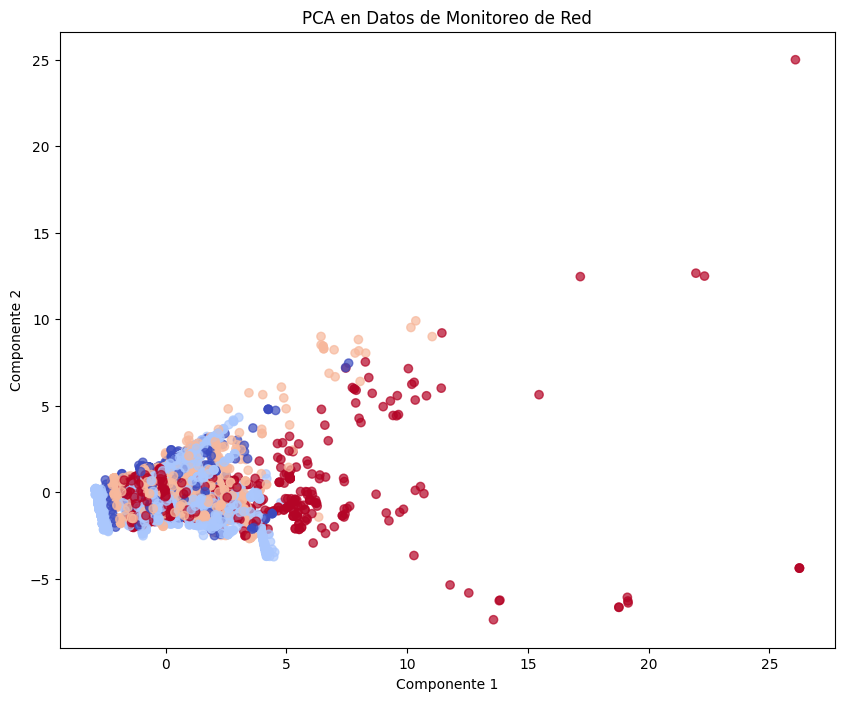

In [71]:
#use pca for comparison with the tsne
from sklearn.decomposition import PCA

# Inicializar PCA
pca = PCA(n_components=2)

# Ajustar y transformar los datos
reduced_X_pca = pca.fit_transform(data)

# Visualizar los resultados
plt.figure(figsize=(10, 8))
plt.scatter(reduced_X_pca[:, 0], reduced_X_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.7)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA en Datos de Monitoreo de Red')
plt.show()


logistic Regression

In [76]:
#logistic regression with pca
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(reduced_X_pca, labels, test_size=0.2, random_state=42)

# Inicializar y entrenar un clasificador de Regresión Logística
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predecir las etiquetas de clase para los datos de prueba
y_pred = classifier.predict(X_test)

# Calcular la precisión del clasificador
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador Logistic:", accuracy)





Precisión del clasificador Logistic: 0.38062801129755774


In [77]:
#mlp classifier with pca
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(reduced_X_pca, labels, test_size=0.2, random_state=42)

# Inicializar y entrenar un clasificador de Regresión Logística
classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
classifier.fit(X_train, y_train)

# Predecir las etiquetas de clase para los datos de prueba
y_pred = classifier.predict(X_test)

# Calcular la precisión del clasificador

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador MLP:", accuracy)  

Precisión del clasificador MLP: 0.7768732347566041
